<a href="https://colab.research.google.com/github/Yelis3/musicGenreClassifierByLyrics/blob/master/Clasificador_de_g%C3%A9neros_musicales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Instalar librerías

In [0]:
!pip install kaggle
!pip install -q kaggle-cli
!pip install langdetect

    100% |████████████████████████████████| 81kB 3.3MB/s 
    100% |████████████████████████████████| 5.3MB 5.8MB/s 
    100% |████████████████████████████████| 92kB 30.7MB/s 
    100% |████████████████████████████████| 51kB 22.3MB/s 
    100% |████████████████████████████████| 1.0MB 22.5MB/s 
  Stored in directory: /root/.cache/pip/wheels/ec/0c/a9/1647275e7ef5014e7b83ff30105180e332867d65e7617ddafe
Successfully built langdetect


#1 Dataset

El dataset que se uso fue [380,000+ lyrics from MetroLyrics](https://www.kaggle.com/gyani95/380000-lyrics-from-metrolyrics) de Kaggle. Este dataset cuenta con el titulo, año, artista, genero y la letra de aproximadamente de 362236 canciones.


##1.1 Descargar de kaggle

In [3]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"jesusfchavarro","key":"42c183ccefbbf38dc96d620ed372f3bd"}'}

In [4]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

!kaggle config set -n path -v /content
!kaggle datasets download -d gyani95/380000-lyrics-from-metrolyrics

- path is now set to: /content
 95% 94.0M/98.5M [00:00<00:00, 147MB/s]
100% 98.5M/98.5M [00:00<00:00, 183MB/s]


##1.2 Limpieza


In [0]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

###1.2.1 Letras y generos inutiles
Se eliminan los registros con generos 'Not Available' y 'Other' y sin letras.


In [0]:
data = pd.read_csv('/content/datasets/gyani95/380000-lyrics-from-metrolyrics/380000-lyrics-from-metrolyrics.zip')    # read csv
data = data.drop(data[(data.genre == 'Not Available') | (data.genre == 'Other') | (data.lyrics.isna())].index)
data.head()


,index,song,year,artist,genre,lyrics
0,0,ego-remix,2009,beyonce-knowles,Pop,"Oh baby, how you doing?\nYou know I'm gonna cu..."
1,1,then-tell-me,2009,beyonce-knowles,Pop,"playin' everything so easy,\nit's like you see..."
2,2,honesty,2009,beyonce-knowles,Pop,If you search\nFor tenderness\nIt isn't hard t...
3,3,you-are-my-rock,2009,beyonce-knowles,Pop,"Oh oh oh I, oh oh oh I\n[Verse 1:]\nIf I wrote..."
4,4,black-culture,2009,beyonce-knowles,Pop,"Party the people, the people the party it's po..."


###1.2.2 Lenguaje
Como el dataset contiene canciones en varios idiomas se usa la libreria langdetect para agregar esta caracteristicas al dataset, dado que es un proceso que toma bastante tiempo guardamos todo en un archivo para evitar hacerlo varias veces.



In [0]:
#No correr al menos que se quiera modificar el dataset
from langdetect import detect

def try_detect(text):
  l = 75 if len(text) > 50 else len(text)
  try:
    return detect(text[:l])
  except:
    return "NN"
  
data['language'] = data.lyrics.apply(lambda r : try_detect(r))

Bajamos el dataset ya procesado de kaggle

In [5]:
!kaggle datasets download -d jesusfchavarro/237427lyricsfrommetrolyticscsv

data = pd.read_csv('/content/datasets/jesusfchavarro/237427lyricsfrommetrolyticscsv/237427lyricsfrommetrolyticscsv.zip')    # read csv

 78% 65.0M/83.3M [00:01<00:00, 25.1MB/s]
100% 83.3M/83.3M [00:02<00:00, 43.2MB/s]


###1.2.3 Numero minimo de palabras

Varias canciones tienen como letra cosas como "Intrumental" o "Orchestra". Para evitar este tipo de canciones eliminamos todas las cancioens con menos de 14 palabras.

In [0]:
import re

data = data[data.lyrics.apply(lambda x: len(re.split(r'\s+|\W+',re.sub(r'\[.*\]|\(.*\)', '', x)))>13 )]

##1.3 Analisis del dataset

Despues de limpiar el dataset terminamos con una cantidad de 206361 canciones.A continuación se sacaran algunos datos que nos parecio importante tener en cuenta.

###1.3.1 Genero

La distribucion de generos en el dataset se puede apreciar en las siguientes graficas. Se aprecia que los 2 generos con mas registros son Rock y Pop con el 46% y el 17% de canciones aproximadamente, y los generos con menos registros son Folk e Indie con el 0.94% y el 1.33% respectivamente.

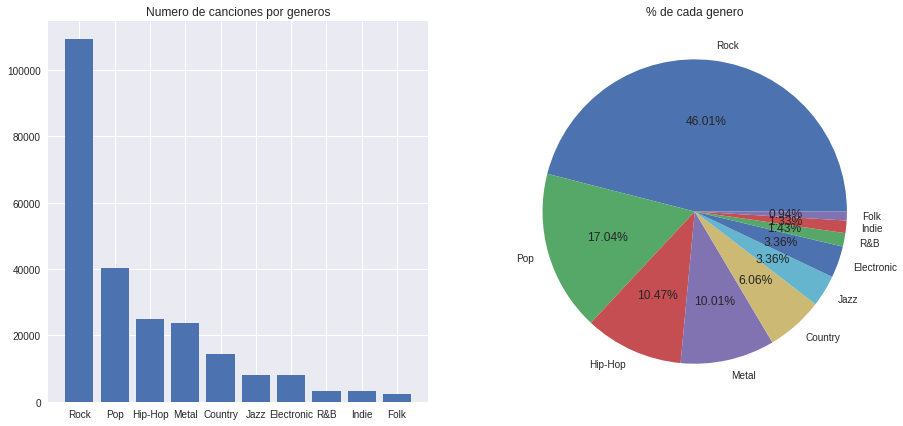

In [0]:
plot_data = data['genre'].value_counts()

plt.figure(1, figsize=(15, 7))
plt.subplot(121)
plt.title('Numero de canciones por generos')
plt.bar(np.arange(len(plot_data)), plot_data.values)
plt.xticks(np.arange(len(plot_data)), plot_data.keys().values)
plt.grid(True)

plt.subplot(122)
plt.title('% de cada genero')
plt.pie(plot_data.values, labels=plot_data.keys().values,
        autopct = '%1.2f%%')

plt.show()

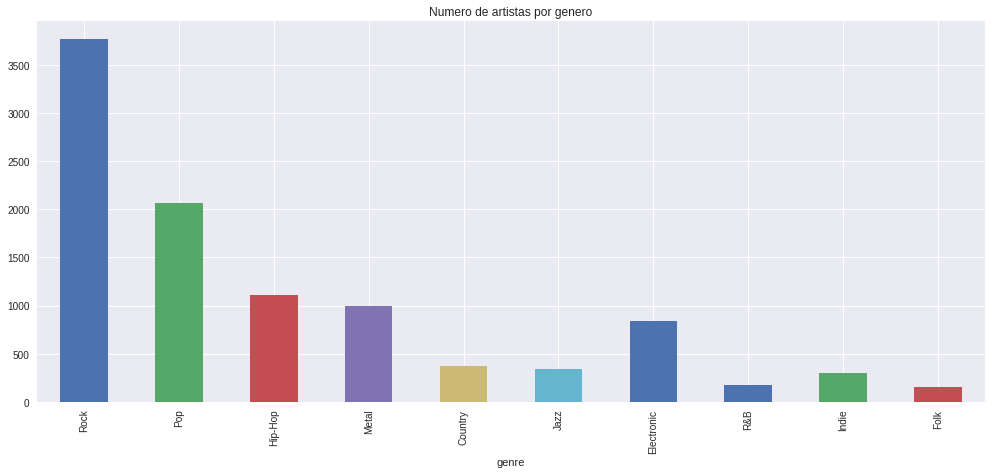

In [0]:
data.groupby(['genre'])['artist'].unique()[bar_data.keys().values].apply(len).plot('bar',title="Numero de artistas por genero",figsize=(17, 7))

###1.3.2 Artistas
Cuales son los artistas con mayor numero de canciones.

In [0]:
data['artist'].value_counts()[:20]


dolly-parton         744
elton-john           676
chris-brown          628
barbra-streisand     607
bob-dylan            596
eddy-arnold          591
bee-gees             591
eminem               578
ella-fitzgerald      571
david-bowie          570
american-idol        568
dean-martin          560
b-b-king             543
celine-dion          540
elvis-costello       522
bruce-springsteen    509
beach-boys           495
bill-anderson        466
eric-clapton         461
frank-zappa          457
Name: artist, dtype: int64

###1.3.3 Lenguaje

Como se distribuye los diferentes lenguajes en el dataset.

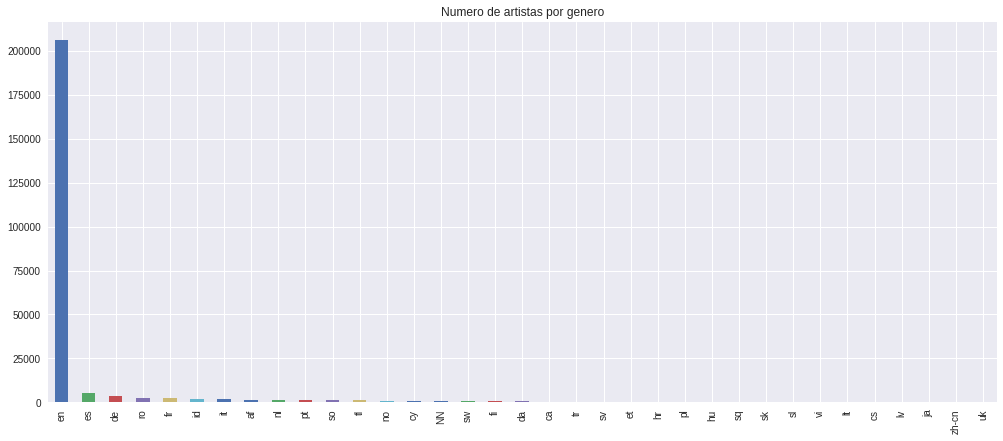

In [0]:
data['language'].value_counts().plot('bar',title="Numero de artistas por genero", figsize=(17, 7))

##1.4 Dividir los datos de train y test

In [10]:
from sklearn.model_selection import train_test_split

dataEN = data[data.language == 'en']   # select only the english songs
X = dataEN.drop(columns="genre")       # leave the rest of the data (x)
y = dataEN['genre'].values             # extract genre data into numpy array (y)

print(X.shape)
X.head()

(205423, 6)


,index,song,year,artist,lyrics,language
0,0,ego-remix,2009,beyonce-knowles,"Oh baby, how you doing?\nYou know I'm gonna cu...",en
1,1,then-tell-me,2009,beyonce-knowles,"playin' everything so easy,\nit's like you see...",en
2,2,honesty,2009,beyonce-knowles,If you search\nFor tenderness\nIt isn't hard t...,en
3,3,you-are-my-rock,2009,beyonce-knowles,"Oh oh oh I, oh oh oh I\n[Verse 1:]\nIf I wrote...",en
4,4,black-culture,2009,beyonce-knowles,"Party the people, the people the party it's po...",en


In [0]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1000)

In [12]:
x_train.head()

,index,song,year,artist,lyrics,language
234294,357624,power-of-the-female,2008,cherish,All the fellas\nWanna tell ya\nWe comin' throu...,en
53432,83813,nobody-owns-me,2014,belinda-carlisle,Nobody owns me\nI don't wanna be anybody's foo...,en
69246,108361,man-papers-his-crack,2006,chumbawamba,"Hey Manfred, what you doing back there?\nCome ...",en
130304,199943,close-to-the-edge,2009,diamond-rio,Well I've always been a rounder\nWith a passio...,en
39537,61971,take-me-back,2006,basement-jaxx,Everybody's all alone\nEverybody's had enough\...,en


#2 Preprocessing 

##2.1 Word Embeddings


###2.1.1 Tokenizer

Usamos el tokenizer de keras para crear una represetacion vectorial de las letras de las canciones.

In [0]:
from keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(num_words=20000)
tokenizer.fit_on_texts(x_train.lyrics.values)

X_train = tokenizer.texts_to_sequences(x_train.lyrics.values)
X_test = tokenizer.texts_to_sequences(x_test.lyrics.values)

vocabulary_size = len(tokenizer.word_index) + 1

In [30]:
vocabulary_size

190106

In [20]:
print(x_train.lyrics.values[2][:170])
print(X_train[2])

Hey Manfred, what you doing back there?
Come on, come unclean, man!
You can turn your back when you paper your crack
You can turn both cheecks, you can de-odour the reek

[150, 34, 3, 503, 64, 76, 60, 14, 60, 9987, 94, 3, 36, 180, 12, 64, 33, 3, 856, 12, 911, 3, 36, 180, 545, 3, 36, 797, 1, 3, 36, 1141, 12, 246, 11, 10, 33, 3, 57, 84, 24, 3, 22, 456, 116, 23, 12, 1920, 872, 20, 37, 1, 1031, 14, 95, 246, 6, 857, 11, 1200, 5648, 475, 20, 37, 1, 1031, 9, 95, 256, 11, 1200, 1567, 475, 150, 399, 4, 7, 60, 14, 399, 4, 7, 94, 185, 138, 16, 1031, 9, 76, 626, 402, 16, 37, 1, 3005, 21, 1170, 588, 393, 31, 380, 101, 3, 50, 12, 1031, 113, 4036, 67, 10, 41, 94, 60, 14, 29, 3, 216, 29, 12, 3351, 66, 133, 66, 110, 1031, 239, 19, 4900, 829, 3, 70, 77, 1, 1031, 99, 33, 20, 284, 195, 43, 195, 43, 195, 43, 195, 43, 195, 43]


Por facilidad dejaremos todas las letras de las canciones con el mismo numero de palabras. Como el promedio de palabras por cancion es 229 dejaremos el tamaño de 250

In [36]:
from keras.preprocessing.sequence import pad_sequences

maxlen=250

X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)

print(x_train.lyrics.values[2][:])
print(X_train[2])

Hey Manfred, what you doing back there?
Come on, come unclean, man!
You can turn your back when you paper your crack
You can turn both cheecks, you can de-odour the reek
You can wash your hands of it, when you have been
But you don't fool us with your Mister Clean
We got the brown on our hands, a piece of Momma Nature's land
We got the brown in our glands, care of Momma Nature land
Hey Manfred, Manfred, listen to me, come on listen to me man. Inside we're all brown in there somewhere, we've all got the biz. So quit holding ground, no matter who you are your brown still smells. Let it out, man, come on. It's you soul, it's your soil.
As long as there's brown we'll be sticking 'round
You take away the brown, that's when we start going down
Going down, going down, going down, going down...
[  150    34     3   503    64    76    60    14    60  9987    94     3
    36   180    12    64    33     3   856    12   911     3    36   180
   545     3    36   797     1 11101     3    36  1141  

####2.1.1.1 Estadisticas con el tokenizer

In [31]:
lyrics_size_words = list(map(len, X_train))
print("Cantidad de palabras promedio: ", sum(lyrics_size_words)/len(lyrics_size_words))
print("Cantidad maxima de palabras: ", max(lyrics_size_words))
print("Cantidad minima de palabras: ", min(lyrics_size_words))

Cantidad de palabras promedio:  229.1607742086235
Cantidad maxima de palabras:  4177
Cantidad minima de palabras:  0


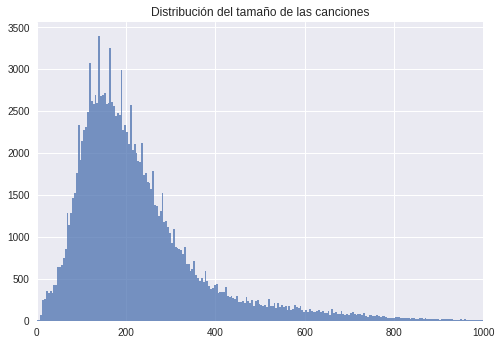

In [32]:
plt.hist(lyrics_size_words, 1000, alpha=0.75)
plt.title('Distribución del tamaño de las canciones')
plt.xlim(0, 1000)
plt.show()

###2.1.1 GloVe

In [24]:
!wget http://nlp.stanford.edu/data/glove.6B.zip
!unzip glove*.zip

--2019-02-25 18:48:40--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2019-02-25 18:48:40--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip.1’

glove.6B.zip.1      100%[===================>] 822.24M  14.8MB/s    in 32s     

2019-02-25 18:49:13 (25.6 MB/s) - ‘glove.6B.zip.1’ saved [862182613/862182613]

Archive:  glove.6B.zip
replace glove.6B.50d.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace glove.6B.100d.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


In [25]:
tokenizer.word_index

{'the': 1,
 'i': 2,
 'you': 3,
 'to': 4,
 'and': 5,
 'a': 6,
 'me': 7,
 'my': 8,
 'in': 9,
 'it': 10,
 'of': 11,
 'your': 12,
 'that': 13,
 'on': 14,
 "i'm": 15,
 'all': 16,
 'is': 17,
 'for': 18,
 'be': 19,
 'we': 20,
 'so': 21,
 "don't": 22,
 'with': 23,
 'but': 24,
 'know': 25,
 'like': 26,
 'love': 27,
 'this': 28,
 "it's": 29,
 'just': 30,
 'no': 31,
 'up': 32,
 'when': 33,
 'what': 34,
 'now': 35,
 'can': 36,
 'got': 37,
 'do': 38,
 'oh': 39,
 'get': 40,
 'out': 41,
 'if': 42,
 'down': 43,
 'one': 44,
 'time': 45,
 'they': 46,
 'go': 47,
 'see': 48,
 'was': 49,
 'are': 50,
 "you're": 51,
 'never': 52,
 'will': 53,
 'from': 54,
 'not': 55,
 'want': 56,
 'have': 57,
 'she': 58,
 "can't": 59,
 'come': 60,
 'way': 61,
 'at': 62,
 'baby': 63,
 'back': 64,
 'say': 65,
 'as': 66,
 'let': 67,
 'yeah': 68,
 'make': 69,
 'take': 70,
 'her': 71,
 "i'll": 72,
 'he': 73,
 'how': 74,
 'life': 75,
 'there': 76,
 'away': 77,
 'here': 78,
 'feel': 79,
 'right': 80,
 'by': 81,
 'gonna': 82,
 "i've

###2.1.2 Embedding Layer

In [0]:
def plot_history(history):
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

array(['Deathray, deathray\nDeathray, deathray\nDeathray, deathray\nDeathray, deathray\nDeathray, deathray\nDeathray, deathray\nDeathray, deathray\nDeathray, deathray',
       'Danceaholic\nDanceaholic\nDanceaholic\nDanceaholic\nDanceaholic\nDanceaholic\nDanceaholic\nDanceaholic\nDanceaholic\nDanceaholic\nDanceaholic\nDanceaholic\nDanceaholic\nDanceaholic\nDanceaholic\nDanceaholic\nDanceaholic\nDanceaholic\nDanceaholic'],
      dtype=object)